In [1]:
from atmPy import sizedistribution

In [2]:
%matplotlib inline

# size distribution

## simulate a sizedistribution

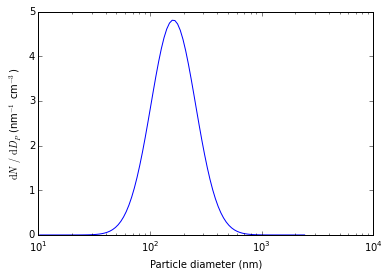

In [87]:
sd = sizedistribution.simulate_sizedistribution(diameter=[10, 2500],
                                                numberOfDiameters=100, 
                                                centerOfAerosolMode=200, 
                                                widthOfAerosolMode=0.2, 
                                                numberOfParticsInMode=1000)
f,a = sd.plot_distribution()

## convert size distribution between representations

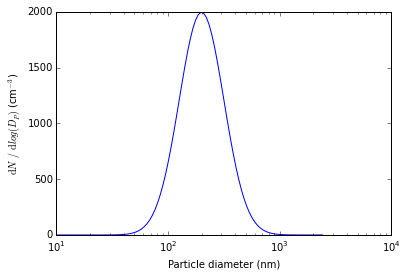

In [4]:
sd = sd.convert2dNdlogDp() #this is not an inplace operation. It returns a new object
f,a = sd.plot_distribution()

## save and read a sizedistribution

In [8]:
sd.save_csv('data/size_distribution.cvs')

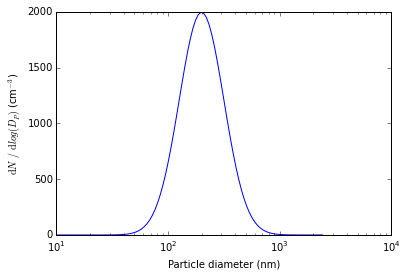

In [9]:
unsave = sizedistribution.read_distribution_csv('data/size_distribution.cvs')
f,a = unsave.plot_distribution()

#size distribution time series

## simulate sizedistribution time series

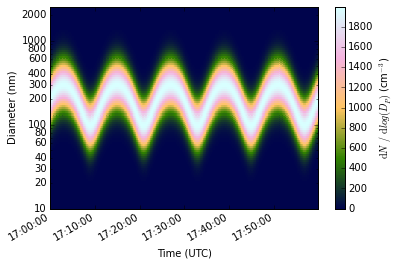

In [23]:
sdtsf = sizedistribution.simulate_sizedistribution_timeseries()
sdtsf = sdtsf.convert2dNdlogDp()
f,a,pc,cb = sdtsf.plot_distribution(removeTickLabels=['50', '70', '90', '500','700', '900'])

## zoom in 

The following procedure will actually truncate your data. This is usefull if your data volume is very big. And it is necessary when you want to create a single sizedistribution instance from this particular stretch of time (see below)

In [24]:
sdtsf.get_timespan()

(Timestamp('2014-11-24 17:00:00', offset='10S'),
 Timestamp('2014-11-24 17:59:50', offset='10S'))

(<matplotlib.figure.Figure at 0x10e400110>,
 <matplotlib.colorbar.Colorbar instance at 0x1140f57e8>)

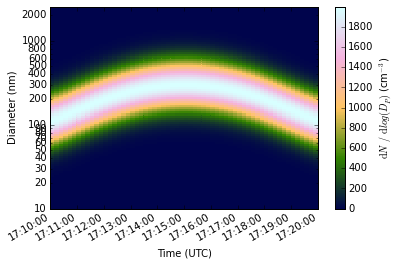

In [25]:
sdtsfZ = sdtsf.zoom_time('2014-11-24 17:10:00','2014-11-24 17:20:00')
sdtsfZ.plot_distribution()

## change the resolution

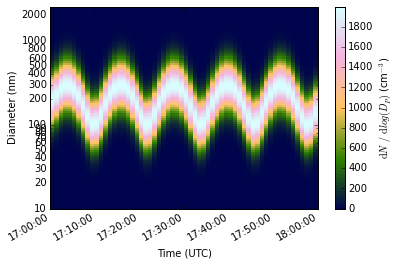

In [35]:
sdtsfL = sdtsf.average_overTime('60S')
f,a,pc,cb = sdtsfL.plot_distribution()

## average over all time

In [36]:
sd = sdtsf.average_overAllTime()

(<matplotlib.figure.Figure at 0x113ab76d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11489bb10>)

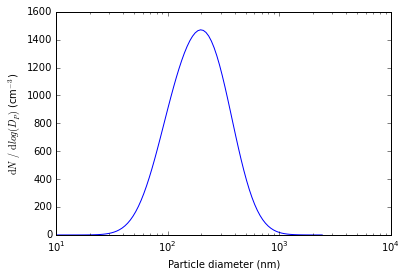

In [37]:
sd.plot_distribution()

# size distribution layer series

[    0.    60.   120.   180.   240.   300.   360.   420.   480.   540.
   600.   660.   720.   780.   840.   900.   960.  1020.  1080.  1140.
  1200.  1260.  1320.  1380.  1440.  1500.  1560.  1620.  1680.  1740.
  1800.  1860.  1920.  1980.  2040.  2100.  2160.  2220.  2280.  2340.
  2400.  2460.  2520.  2580.  2640.  2700.  2760.  2820.  2880.  2940.
  3000.  3060.  3120.  3180.  3240.  3300.  3360.  3420.  3480.  3540.
  3600.  3660.  3720.  3780.  3840.  3900.  3960.  4020.  4080.  4140.
  4200.  4260.  4320.  4380.  4440.  4500.  4560.  4620.  4680.  4740.
  4800.  4860.  4920.  4980.  5040.  5100.  5160.  5220.  5280.  5340.
  5400.  5460.  5520.  5580.  5640.  5700.  5760.  5820.  5880.  5940.
  6000.]


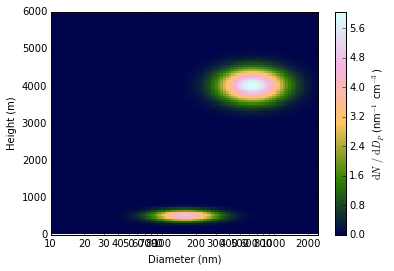

In [129]:
sdls = sizedistribution.simulate_sizedistribution_layerseries()
f,a,pc,cb = sdls.plot_distribution()

In [273]:
reload(sizedistribution)

<module 'atmPy.sizedistribution' from '/Users/htelg/prog/atm-py/atmPy/sizedistribution.py'>

## add an aerosol layer

In [321]:
sdls = sizedistribution.aerosolSizeDistribution_layerseries(None, sd.bins, sd.distributionType, None)

sd = sizedistribution.simulate_sizedistribution(centerOfAerosolMode=100)
lb = [0,10]
sdls.add_layer(sd, lb)

sd = sizedistribution.simulate_sizedistribution(centerOfAerosolMode=200)
lb = [10,20]
sdls.add_layer(sd, lb)

sd = sizedistribution.simulate_sizedistribution(centerOfAerosolMode=300)
lb = [20,30]
sdls.add_layer(sd, lb)
sd = sizedistribution.simulate_sizedistribution(centerOfAerosolMode=400)
lb = [30,40]
sdls.add_layer(sd, lb)

(<matplotlib.figure.Figure at 0x118cacc10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x119477c10>)

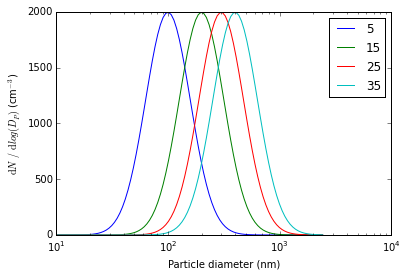

In [322]:
sdls = sdls.convert2dNdlogDp()
sdls.plot_eachLayer()

## calculate AOD

ACTION required: 
- what to do with gaps in the layers when clauclating the AOD?!?
- testing!!!

###### create a aerosol layer instance and put some layers in

In [417]:
sdls = sizedistribution.aerosolSizeDistribution_layerseries(None, sd.bins, sd.distributionType, None)

sd = sizedistribution.simulate_sizedistribution(centerOfAerosolMode=400)
lb = [0,10]
sdls.add_layer(sd, lb)

sd = sizedistribution.simulate_sizedistribution(centerOfAerosolMode=200)
lb = [10,20]
sdls.add_layer(sd, lb)

sd = sizedistribution.simulate_sizedistribution(centerOfAerosolMode=300)
lb = [20,30]
sdls.add_layer(sd, lb)
sd = sizedistribution.simulate_sizedistribution(centerOfAerosolMode=400)
lb = [30,40]
sdls.add_layer(sd, lb)

###### calculate AOD 

In [418]:
AOD = sdls.calculate_AOD()

In [419]:
AOD.keys()

['AOD', 'extCoeffPerLayer', 'AOD_layer']

In [420]:
AOD['AOD']

0.016044878050970806

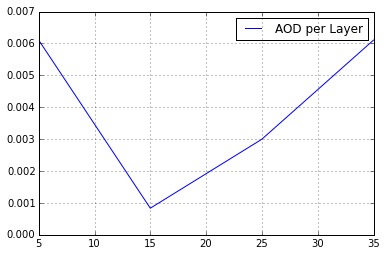

In [421]:
AOD['AOD_layer'].plot()

[]

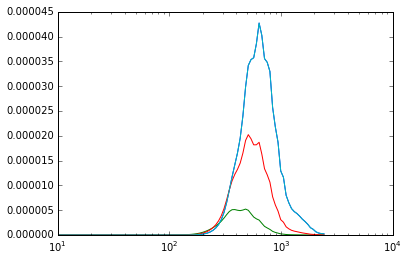

In [424]:
for e,lay in enumerate(AOD['extCoeffPerLayer'].values):
    plt.plot(sdls.bincenters,lay)
plt.semilogx()